# Контрольная работа 1

*Вариант 5*

*Богдан Владислав*

### 1. Найти сингулярное разложение для матрицы А:
$$
A =
  \left[ {\begin{array}{cccc}
   27 & 23 & -4 \\
   -15 & -6 & 29 \\
   12 & 29 & -4 \\
   15 & 20 & 6 \\
  \end{array} } \right]
$$

Будем искать сингулярное разложение в виде $ A = U S V^{*} $.

Сначала найдём матрицу $ B = A A^T $ и её собственные значения. Сингулярные значения матрицы $ A $ есть квадратные корни из соответствующих собственных значений матрицы $ B $. $ S $ формируется как диагональная матрица с сингулярными значениями на диагонали. Матрица $ U $ составляется их соответствующих собственных векторов.

In [104]:
import numpy as np
from numpy import linalg

In [131]:
A = np.array([
    [27, 23, -4], 
    [-15, -6, 29],
    [12, 29, -4],
    [15, 20, 6]
])

B = A @ A.transpose()
S_squared, U = np.linalg.eig(B)

S = np.sqrt(S_squared)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


Теперь справедливое выражение: $$ SV^{*} = U^{-1}A $$
Поскольку $ S $ - диагональная матрица, то матрица $ V^{*} $ получается путем деления строк матрицы $ U^{-1}A $ на скаляры из соответствующих строк матрицы $ S $.

In [132]:
V_pre = (np.linalg.inv(U) @ A).transpose()

V_pre[:,0] /= S[0]
V_pre[:,1] /= S[1]
V_pre[:,2] /= S[2]

V = np.delete(V.transpose(), 3, 0)

Получили следующие значения:

In [136]:
print("U:", U)

S_matrix = np.zeros((3,4))
S_matrix[:,:-1] = np.diag(S[:3])
S_matrix = S_matrix.transpose()
print("S:", S_matrix)

print("V*:", V)

U: [[ 0.63189875 -0.08883085  0.58888347  0.49601341]
 [-0.37563614 -0.88733767  0.04753892  0.26319079]
 [ 0.53874955 -0.20725599 -0.78841919  0.21257718]
 [ 0.41152202 -0.40222616  0.17132277 -0.7996951 ]]
S: [[ 55.42564122   0.           0.        ]
 [  0.          29.1330773    0.        ]
 [  0.           0.          10.82876273]
 [  0.           0.           0.        ]]
V*: [[ 0.63749616  0.73326469 -0.23647736]
 [ 0.08207742 -0.36982123 -0.92547045]
 [ 0.76606915 -0.57057441  0.29594409]]


Мы можем проверить полученный результат:

In [137]:
print("A:", A)
print("USV*:", U @ S_matrix @ V)

A: [[ 27  23  -4]
 [-15  -6  29]
 [ 12  29  -4]
 [ 15  20   6]]
USV*: [[ 27.  23.  -4.]
 [-15.  -6.  29.]
 [ 12.  29.  -4.]
 [ 15.  20.   6.]]


### 2. Найти какое-нибудь разложение полного ранга для А (из первого задания) и псевдообратную матрицу.

Разложение полного ранга - такое представление $ A = BC $, где $ B $ имеет размерность $ 4 \times r $, а $ A $ - размерность $ r \times 3 $, где $ r $ - ранг матрицы $ A $. Найдём его:

In [147]:
np.linalg.det(A[:3])

-13982.999999999996

Минор третьего (одна из размерностей матрицы) порядка не равен 0, соответственно, ранг матрицы $ r = 3 $.

В качестве $ C $ можно взять первые три строки матрицы $ A $ - они являются линейно независимыми. Тогда $ B = AC^{+} $, где $ C^{+}$ - псевдообратная к $ C $ матрица.

In [148]:
C = A[:3]
C_pseudo = C.transpose() @ np.linalg.inv(C @ C.transpose())
B = A @ C_pseudo

Проверим, что найденные матрицы $ B, C $ действительно удовлетворяют условию:

In [149]:
print("A: ", A)
print("A = BC: ", B @ C)

A:  [[ 27  23  -4]
 [-15  -6  29]
 [ 12  29  -4]
 [ 15  20   6]]
A = BC:  [[ 27.  23.  -4.]
 [-15.  -6.  29.]
 [ 12.  29.  -4.]
 [ 15.  20.   6.]]


Теперь псевдообратная матрица для $ A $ может быть найдена по формуле $ A^{+} = C^{T} (CC^{T})^{-1} (B^{T}B)^{-1}B^{T} $:

In [150]:
A_pseudo = C.transpose() @ np.linalg.inv(C @ C.transpose()) @ np.linalg.inv(B.transpose() @ B) @ B.transpose()
print("A+: ", A_pseudo)

A+:  [[ 0.04867765 -0.00345733 -0.05016317  0.0157201 ]
 [-0.02154118  0.00378964  0.05130075  0.00152315]
 [ 0.01621971  0.03108995 -0.01726177  0.01570389]]


### 3. Решение системы линейных уравнений

Дана система линейных уравнений $AX=B$. Найдём ранг матрицы $A$:

In [168]:
A = np.array([[-28, 3, -10, 39],
     [-25, -10, -22, 27],
     [19, 14, 14, -17],
     [-9, -26, 21, 4]])
B = np.array([-21, -18, 13, 13])

np.linalg.matrix_rank(A)

4

Отсюда следует, что данная система линейных уравнений имеет ровно одно решение, которое может быть посчитано точными методами:

In [171]:
np.linalg.solve(A, B)

array([ 4.61898962, -1.735914  , -0.10024359,  2.8855645 ])

Или, например, с использованием обратной матрицы:

In [172]:
np.linalg.inv(A) @ B

array([ 4.61898962, -1.735914  , -0.10024359,  2.8855645 ])

Нашли точное решение системы линейных уравнений.

### 4. Наилучшее равномерное приближение

Задан многочлен $ x^3 - 2x^2 + 4x - 2$ на отрезке $ [1,3] $ - требуется найти наилучшее равномерное приближение этого многочлена многочленом второй степени. Сделаем следующую замену переменной: $ y = x - 2; x = y + 2 $. Получим многочлен $f(y) = y^3 + 4y^2 + 8y + 6$, определённый уже на отрезке $[-1,1]$. Известно, что наименьшее отклонение от нуля на отрезке $[-1,1]$ среди всех многочленов третьей степени имеет многочлен $\frac{1}{2^2}T_3(y) = \frac{1}{4}(4y^3 - 3y) = y^3 - \frac{3}{4}y$. Таким образом, для многочлена второй степени $g(y)$, который наилучшим образом приближает многочлен $f(y)$ справедливо:
$$ g(y) = f(y) - (y^3 - \frac{3}{4}y) = y^3 + 4y^2 + 8y + 6 - y^3 + \frac{3}{4}y = 4y^2 + \frac{35}{4}y + 6 $$
$$ g_1(x) = g(x-2) = 4(x-2)^2 + \frac{35}{4}(x-2) + 6 = 4x^2 - \frac{29}{4}x + \frac{9}{2}, x \in [1,3] $$
Посмотрим на графики функций $f(y)$ и $g_1(y)$

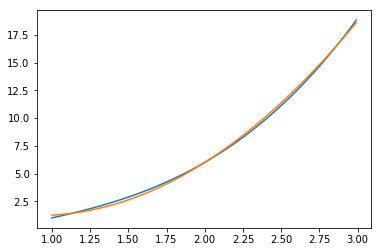

In [159]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1., 3., 0.01), list(map(lambda x: x**3-2*x**2+4*x-2, np.arange(1., 3., 0.01))))
plt.plot(np.arange(1., 3., 0.01), list(map(lambda x: 4*x**2-7.25*x+4.5, np.arange(1., 3., 0.01))))
plt.show()

Многочлен второй степени действительно приближает многочлен третьей степени из условий задачи!

### 5. Единичная окружность относительно нормы



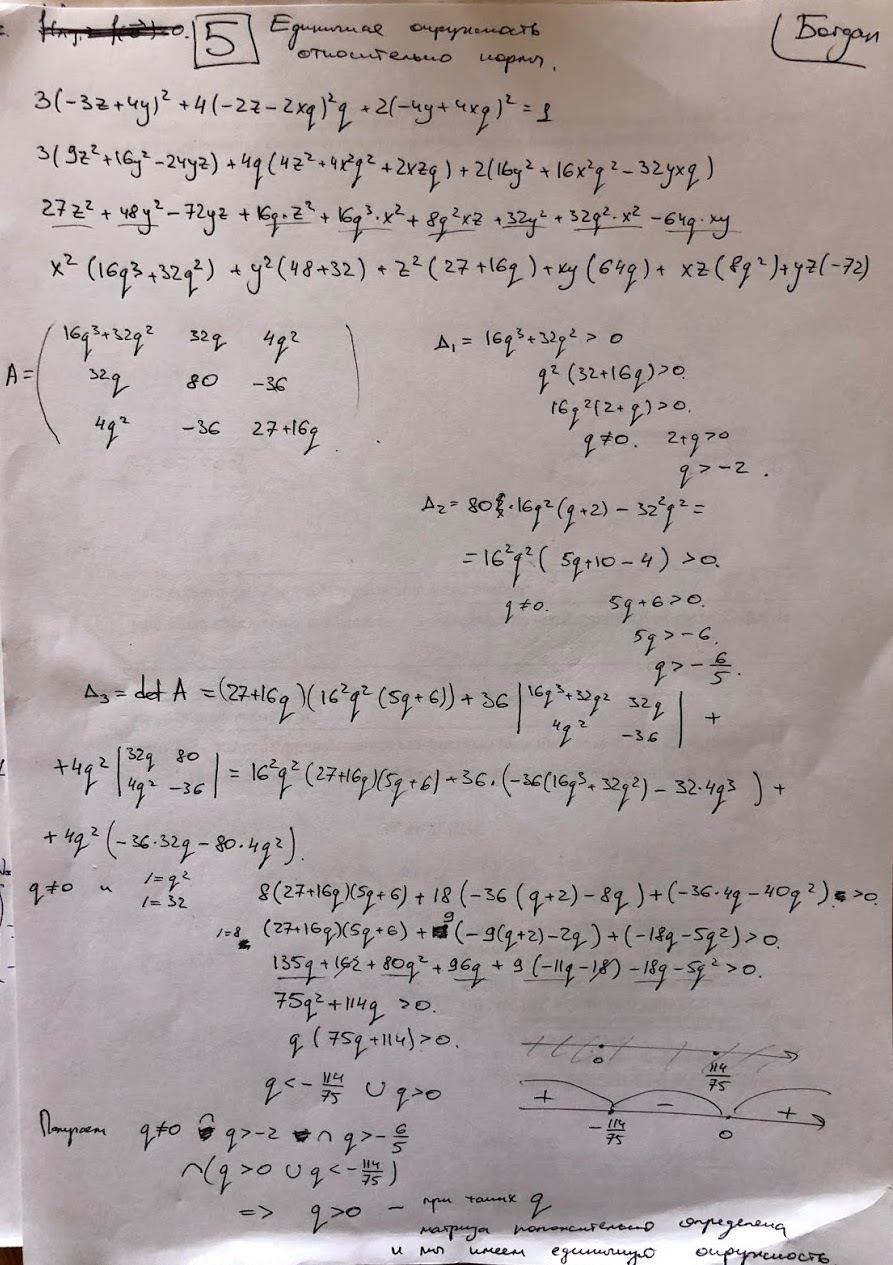

In [1]:
from IPython.display import Image
Image("img/5.jpg")